In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dogs-cats-images/dataset/test_set/cats/cat.4796.jpg
/kaggle/input/dogs-cats-images/dataset/test_set/cats/cat.4897.jpg
/kaggle/input/dogs-cats-images/dataset/test_set/cats/cat.4626.jpg
/kaggle/input/dogs-cats-images/dataset/test_set/cats/cat.4717.jpg
/kaggle/input/dogs-cats-images/dataset/test_set/cats/cat.4932.jpg
/kaggle/input/dogs-cats-images/dataset/test_set/cats/cat.4008.jpg
/kaggle/input/dogs-cats-images/dataset/test_set/cats/cat.4982.jpg
/kaggle/input/dogs-cats-images/dataset/test_set/cats/cat.4220.jpg
/kaggle/input/dogs-cats-images/dataset/test_set/cats/cat.4692.jpg
/kaggle/input/dogs-cats-images/dataset/test_set/cats/cat.4260.jpg
/kaggle/input/dogs-cats-images/dataset/test_set/cats/cat.4454.jpg
/kaggle/input/dogs-cats-images/dataset/test_set/cats/cat.4704.jpg
/kaggle/input/dogs-cats-images/dataset/test_set/cats/cat.4307.jpg
/kaggle/input/dogs-cats-images/dataset/test_set/cats/cat.4522.jpg
/kaggle/input/dogs-cats-images/dataset/test_set/cats/cat.4135.jpg
/kaggle/in

# 1. Importing all the necessary libraries

In [2]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

In [3]:
tf.random.set_seed(3)

# 2. Setting the paths to training and testing directories

In [4]:
base_dir = '../input/dogs-cats-images/dog vs cat/dataset'
train_dir = os.path.join(base_dir, 'training_set')
test_dir = os.path.join(base_dir, 'test_set')

In [5]:
# Directory with training cat pictures
train_cats_dir = os.path.join(train_dir, '/cats')

# Directory with training dog pictures
train_dogs_dir = os.path.join(train_dir, '/dogs')

# Directory with test cat pictures
test_cats_dir = os.path.join(test_dir, '/cats')

# Directory with test dog pictures
test_dogs_dir = os.path.join(test_dir, '/dogs')

# 3. Creating ImageDataGenerator objects to generate image data in batches and to apply image augmentation
Reference: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

Note: We apply image augmentation only to the training data

In [6]:
train_datagen = ImageDataGenerator(rescale = 1/255.,
                                   rotation_range = 40,
                                   shear_range = 0.2,
                                   zoom_range = 0.2)

test_datagen = ImageDataGenerator(rescale = 1/255.)

## Creating the train and test generators
Reference: https://keras.io/api/preprocessing/image/#flowfromdirectory-method

In [7]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (150,150),
                                                    batch_size = 20,
                                                    class_mode = 'binary')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                    target_size = (150,150),
                                                    batch_size = 20,
                                                    class_mode = 'binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


# 4. Creating and compiling a CNN model

In [8]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(lr = 0.0001),
              metrics = ['accuracy'])

In [9]:
history = model.fit(train_generator,
                    validation_data = test_generator,
                    epochs = 20,
                    steps_per_epoch = 400,
                    validation_steps = 100)
# the number of steps = amount of data / batch size
# steps_per_epoch = training data / batch size = 8000/ 20 = 400
# validation_steps = test data / batch size = 2000/ 20 = 100

Epoch 1/20
400/400 [==============================] - 95s 238ms/step - loss: 0.6707 - accuracy: 0.5769 - val_loss: 0.6128 - val_accuracy: 0.6790
Epoch 2/20
400/400 [==============================] - 73s 183ms/step - loss: 0.6047 - accuracy: 0.6749 - val_loss: 0.5626 - val_accuracy: 0.7190
Epoch 3/20
400/400 [==============================] - 73s 182ms/step - loss: 0.5619 - accuracy: 0.7074 - val_loss: 0.5347 - val_accuracy: 0.7280
Epoch 4/20
400/400 [==============================] - 72s 179ms/step - loss: 0.5334 - accuracy: 0.7272 - val_loss: 0.5029 - val_accuracy: 0.7505
Epoch 5/20
400/400 [==============================] - 72s 179ms/step - loss: 0.5143 - accuracy: 0.7404 - val_loss: 0.4971 - val_accuracy: 0.7510
Epoch 6/20
400/400 [==============================] - 72s 180ms/step - loss: 0.4968 - accuracy: 0.7533 - val_loss: 0.5745 - val_accuracy: 0.7205
Epoch 7/20
400/400 [==============================] - 75s 187ms/step - loss: 0.4813 - accuracy: 0.7631 - val_loss: 0.4470 - val_ac

# 5. Evaluating the model by plotting graphs

1. Training accuracy v/s Validation accuracy
2. Training loss v/s Validation loss

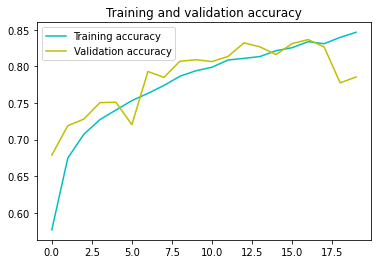

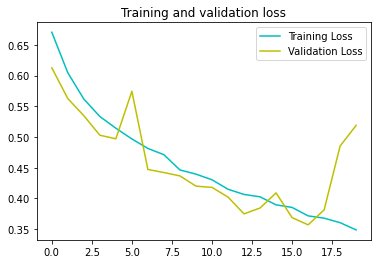

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'c-', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'y-', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'c-', label = 'Training Loss')
plt.plot(epochs, val_loss, 'y-', label = 'Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()